### Assignment 1 
### Peter Ye
**Note:** your records counts will be different, depending on when you query the API

In [1]:
import pandas as pd
import requests
import re 
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

## Fetch the data

In [3]:
%%time

# Define the API endpoint and parameters
url = "https://data.cityofchicago.org/resource/cwig-ma7x.json"

# Fetch the total count of records
def get_total_count(url):
    params = {
        "$select": "count(*)"
    }
    response = requests.get(url, params=params)
    data = response.json()
    return int(data[0]['count'])

total_count = get_total_count(url)
print(f"Total number of records available: {total_count:,.0f}")

Total number of records available: 265,813
CPU times: user 42.6 ms, sys: 17.4 ms, total: 60 ms
Wall time: 739 ms


In [4]:
%%time

# Fetch data and load it into a pandas DataFrame
def fetch_data(url, params):
    response = requests.get(url, params=params)
    data = response.json()
    return pd.DataFrame(data)

# Set the limit parameter equal to the number of available records
params = {
    "$limit": total_count
}

# Fetch the data and load it into a DataFrame
df = fetch_data(url, params)

print(f'Number of records retrieved: {df.shape[0]:,.0f}')

Number of records retrieved: 265,813
CPU times: user 8.27 s, sys: 1.44 s, total: 9.72 s
Wall time: 30.8 s


## Check the data

In [5]:
# Check the data
df.head(5)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,results,violations,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
0,2587730,CINCO ESTRELLAS,CINCO ESTRELLAS,1953695,Restaurant,Risk 1 (High),2908-2912 W 59TH ST,CHICAGO,IL,60629,...,Pass,10. ADEQUATE HANDWASHING SINKS PROPERLY SUPPLI...,41.78646851106931,-87.6964634262659,"{'type': 'Point', 'coordinates': [-87.69646342...",49,21867,61,764,2
1,2587698,THE LEARNING EXPERIENCE,THE LEARNING EXPERIENCE,2516680,Children's Services Facility,Risk 1 (High),4110 W Peterson AVE,CHICAGO,IL,60646,...,Pass,47. FOOD & NON-FOOD CONTACT SURFACES CLEANABLE...,41.9902048994482,-87.73177133891328,"{'type': 'Point', 'coordinates': [-87.73177133...",28,22532,13,748,38
2,2587696,Beaubien Elementary School,Beaubien Elementary School,22201,School,Risk 1 (High),5025 N Laramie (5200W),CHICAGO,IL,60630,...,Pass,39. CONTAMINATION PREVENTED DURING FOOD PREPAR...,41.972379135874,-87.75752776008068,"{'type': 'Point', 'coordinates': [-87.75752776...",20,21869,11,129,50
3,2587731,EL AZTECA,EL AZTECA,2124800,Restaurant,Risk 1 (High),4154-4158 W ARMITAGE AVE,CHICAGO,IL,60639,...,Pass,37. FOOD PROPERLY LABELED; ORIGINAL CONTAINER ...,41.91721711446828,-87.73122940929434,"{'type': 'Point', 'coordinates': [-87.73122940...",27,22615,21,76,12
4,2587715,NEW JB-ONE,NEW JB-ONE,1820524,Restaurant,Risk 1 (High),6359 S COTTAGE GROVE AVE,CHICAGO,IL,60637,...,Pass w/ Conditions,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.77868683415653,-87.60574560006991,"{'type': 'Point', 'coordinates': [-87.60574560...",53,22260,9,347,4


## Clean the data

In [6]:
# print unique values in results and find out Fail represents failed inspection
distinct_strings = df['results'].unique()
print(distinct_strings)

['Pass' 'Pass w/ Conditions' 'Fail' 'No Entry' 'Out of Business'
 'Not Ready' 'Business Not Located']


In [7]:
# Select only the records corresponding to failed inspection (see "results" column)
failed_records = df[df['results'] == 'Fail']

In [8]:
# Clean the data, making sure that there are no NaNs in "violations" column
df_cleaned = failed_records.dropna(subset=['violations'])
df_cleaned.head(50)

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,...,results,violations,latitude,longitude,location,:@computed_region_awaf_s7ux,:@computed_region_6mkv_f3dw,:@computed_region_vrxf_vc4k,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu
5,2587712,MORRILL,MORRILL,24571,School,Risk 1 (High),6011 S Rockwell (2600W) AVE,CHICAGO,IL,60629,...,Fail,5. PROCEDURES FOR RESPONDING TO VOMITING AND D...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2587695,Smart From The Start,Smart From The Start,2216184,Children's Services Facility,Risk 1 (High),4133-4139 W Armitage AVE,CHICAGO,IL,60639,...,Fail,33. PROPER COOLING METHODS USED; ADEQUATE EQUI...,41.917006969693496,-87.73035873163154,"{'type': 'Point', 'coordinates': [-87.73035873...",27,22615,21,135,12
9,2587733,ACE FOOD MART,ACE FOOD MART,2901243,Grocery Store,Risk 2 (Medium),657 E 79 ST,Chicago,IL,60619,...,Fail,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",41.75113132285834,-87.60779910111297,"{'type': 'Point', 'coordinates': [-87.60779910...",31,21546,40,11,32
13,2587666,PIE GUYS BAKERY AND CAFE INC.,PIE GUYS BAKERY AND CAFE INC.,2895850,Restaurant,Risk 1 (High),7907 S CHAMPLAIN AVE,CHICAGO,IL,60619,...,Fail,"38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...",41.75096275197377,-87.60871696411735,"{'type': 'Point', 'coordinates': [-87.60871696...",31,21546,40,11,32
18,2587684,AMO FOOD & DELI,AMO FOOD & DELI,2862515,Grocery Store,Risk 1 (High),4150 W Roosevelt RD,CHICAGO,IL,60624,...,Fail,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.86621695120304,-87.729689336645,"{'type': 'Point', 'coordinates': [-87.72968933...",36,21572,30,98,14
19,2587668,POPEYE'S # 866,POPEYE'S,2738649,Restaurant,Risk 1 (High),7617 S RACINE AVE,CHICAGO,IL,60620,...,Fail,"3. MANAGEMENT, FOOD EMPLOYEE AND CONDITIONAL E...",41.75546441273601,-87.65371781952274,"{'type': 'Point', 'coordinates': [-87.65371781...",17,21554,70,572,31
22,2587681,PETE'S FRESH MARKET,PETE'S FRESH MARKET,2309123,Grocery Store,Risk 1 (High),2333 W MADISON ST,CHICAGO,IL,60612,...,Fail,16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED...,41.88106937422222,-87.68530755272025,"{'type': 'Point', 'coordinates': [-87.68530755...",48,21184,29,766,46
28,2587675,"RICKETTE'S WORLD FAMOUS BBQ, FISH AND CHICKEN","RICKETTE'S WORLD FAMOUS BBQ, FISH AND CHICKEN",2757366,Restaurant,Risk 1 (High),1514 W TAYLOR ST,CHICAGO,IL,60607,...,Fail,22. PROPER COLD HOLDING TEMPERATURES - Comment...,41.86940026045194,-87.66475477893509,"{'type': 'Point', 'coordinates': [-87.66475477...",48,14917,29,758,23
39,2587652,DUNKIN DONUTS,DUNKIN DONUTS,1273761,Restaurant,Risk 2 (Medium),7578 N WESTERN AVE,CHICAGO,IL,60645,...,Fail,16. FOOD-CONTACT SURFACES: CLEANED & SANITIZED...,42.01943899868734,-87.69032202208334,"{'type': 'Point', 'coordinates': [-87.69032202...",42,22528,20,359,27
42,2587634,TWISTED SPOKE,TWISTED SPOKE,37844,Restaurant,Risk 1 (High),501 N OGDEN AVE,CHICAGO,IL,60642,...,Fail,2. CITY OF CHICAGO FOOD SERVICE SANITATION CER...,41.89103918038821,-87.65887051919977,"{'type': 'Point', 'coordinates': [-87.65887051...",41,22620,25,521,46


In [9]:
# Regular expression to match the description
# Any digits Any characters except '.' End with a delimiter of space -
pattern = r'\d+\.\s+([^|]+)\s+-\sComments:'

# Function to extract descriptions
def extract_descriptions(violation_text):
    # Split the text by "|" and then apply the regex to each part
    parts = violation_text.split('|')
    descriptions = [re.search(pattern, part).group(1).strip() 
                    if re.search(pattern, part) 
                    else '' for part in parts]
    return descriptions

# Apply the function to the 'violations' column
df_cleaned['description_only'] = df_cleaned['violations'].apply(extract_descriptions)

## Top-10 the most frequent regulation descriptions

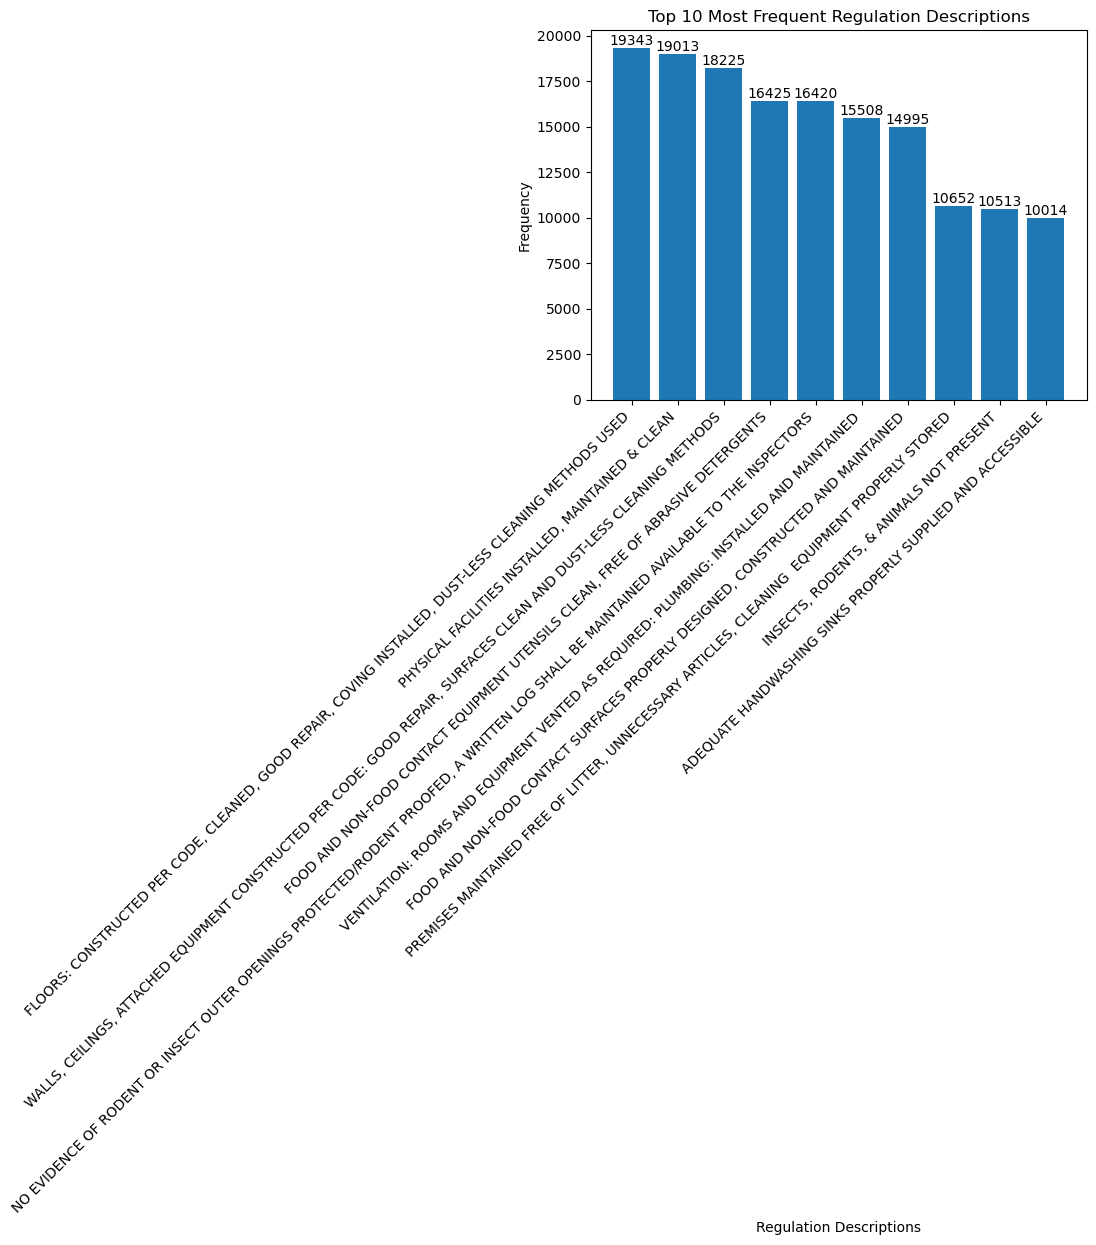

In [10]:
# Transform each regulation of a list-like to a row, replicating the index values
all_descriptions = df_cleaned['description_only'].explode()

# Count the frequencies of each description
description_counts = all_descriptions.value_counts()

# Select the top 10 most frequent descriptions
top_10_descriptions = description_counts.head(10)

# Plotting
bars = plt.bar(top_10_descriptions.index, top_10_descriptions.values)

# Adding the count above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Top 10 Most Frequent Regulation Descriptions')
plt.ylabel('Frequency')
plt.xlabel('Regulation Descriptions')
plt.xticks(rotation=45, ha='right')
plt.show()

## whether violations are the same or different for repeat offenses

In [11]:
# Create a Unique Identifier using 'license' + 'business name' + 'address'
df_cleaned['Business_Identifier'] = df_cleaned['license_'].astype(str) + '_' + df_cleaned['dba_name'] + '_' + df_cleaned['address']

# Group Data by Business Identifier
grouped = df_cleaned.groupby('Business_Identifier')

# Analyze Violations for Repeat Offenders
repeat_offenders = {}
for name, group in grouped:
    if group.shape[0] > 1:  # More than one record indicates a repeat offender
        violations = group['description_only'].tolist()
        repeat_offenders[name] = violations

In [12]:
# Check whether the repeat offenders having common 
for business, violations_lists in repeat_offenders.items():
    # Convert each list of violations to a set for set operations
    violation_sets = [set(violations) for violations in violations_lists]

    # Find common violations across all inspections
    common_violations = set.intersection(*violation_sets)

    # Update the repeat_offenders with Boolean value
    if common_violations:
        repeat_offenders[business] = True
    else:
        repeat_offenders[business] = False

5098 5790 10888


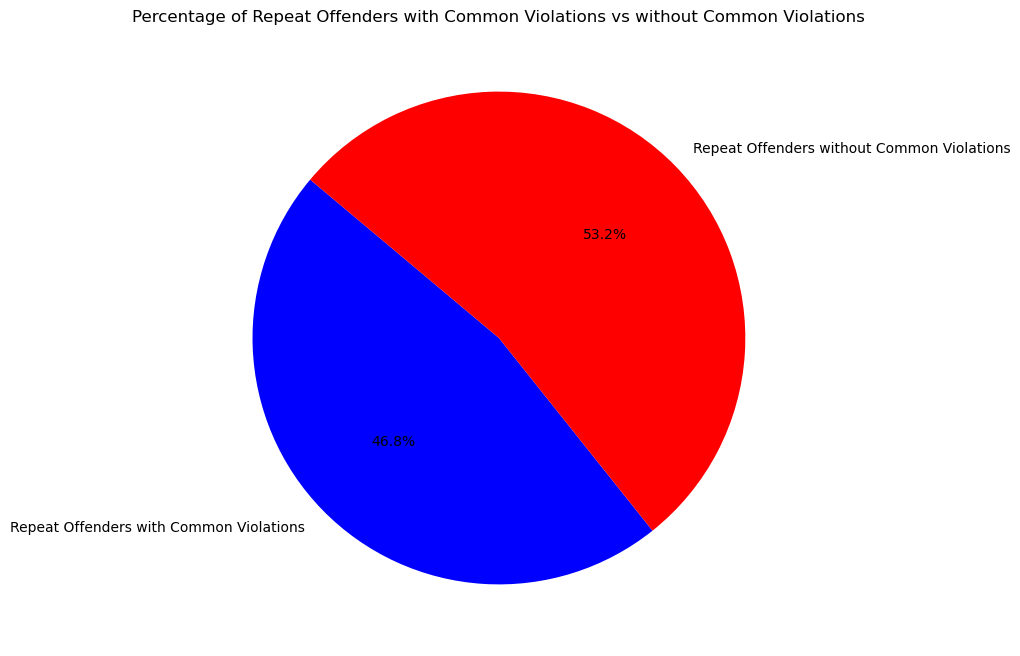

In [13]:
# Count the occurrences of True and False
true_count = sum(value == True for value in repeat_offenders.values())
false_count = sum(value == False for value in repeat_offenders.values())

# Calculate percentages
total = true_count + false_count
true_percentage = (true_count / total) * 100
false_percentage = (false_count / total) * 100

# Data for plotting
statuses = ['Repeat Offenders with Common Violations', 'Repeat Offenders without Common Violations']
percentages = [true_percentage, false_percentage]

print(true_count, false_count, total)

# Plotting the data as a pie chart
plt.figure(figsize=(8, 8))
plt.pie(percentages, labels=statuses, colors=['blue', 'red'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Repeat Offenders with Common Violations vs without Common Violations')
plt.show()

The pie chart reveals that nearly half of the cases, specifically 46.8%, involve repeat offenders. These are entities or individuals who have been found violating the same regulations that they had previously breached. This high percentage of repeat violations indicates a persistent issue with compliance and adherence to the set regulations. It suggests that the consequences or corrective measures in place may not be effective enough to prevent recurrences. This could point to a need for more stringent enforcement, better education or training regarding the regulations, or a deeper analysis of why these repeat violations are occurring. The data underscores the importance of not just identifying but also addressing the root causes of non-compliance to reduce the rate of repeated offenses.

## Is there an extended history of prior violations for these closed restaurants

In [14]:
# Get the Out of Business
df_OoB = df[df['results'] == 'Out of Business']
df_OoB['Business_Identifier'] = df_OoB['license_'].astype(str) + '_' + df_OoB['dba_name'] + '_' + df_OoB['address']
unique_OoB_identifiers = df_OoB['Business_Identifier'].unique().tolist()
unique_Fail_identifiers = df_cleaned['Business_Identifier'].unique().tolist()

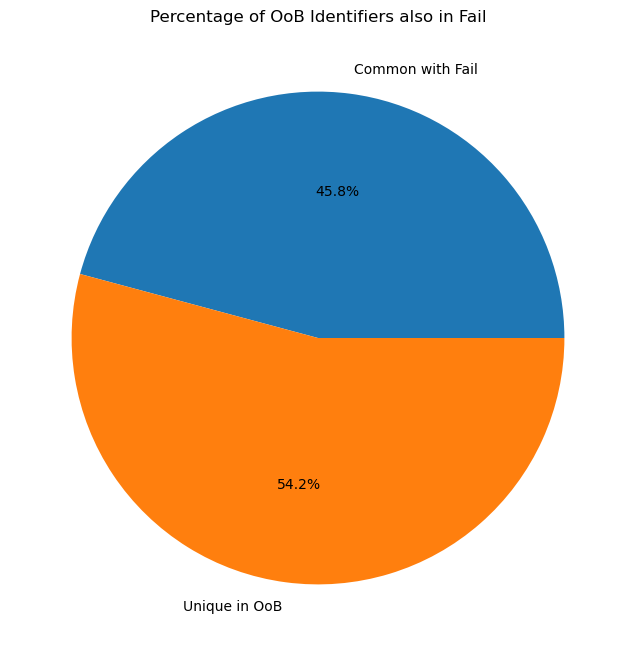

In [15]:
# Recalculating the counts for reflecting the percentage of identifiers in unique_OoB_identifiers that are also in unique_Fail_identifiers
common_identifiers = list(set(unique_OoB_identifiers) & set(unique_Fail_identifiers))
total_oob_identifiers = len(unique_OoB_identifiers)
common_in_oob = len(common_identifiers)
unique_in_oob = total_oob_identifiers - common_in_oob

# New counts for the pie chart
new_oob_counts = [common_in_oob, unique_in_oob]

# New labels for the pie chart
new_oob_labels = ['Common with Fail', 'Unique in OoB']

# Plotting the new pie chart
plt.figure(figsize=(8, 8))
plt.pie(new_oob_counts, labels=new_oob_labels, autopct='%1.1f%%')
plt.title('Percentage of OoB Identifiers also in Fail')
plt.show()

The pie chart indicates that a significant portion, 45.8%, of the restaurants that have closed had a history of previous violations. This suggests a correlation between repeated non-compliance with health or safety regulations and the eventual closure of these establishments. It's possible that these repeated violations led to penalties, loss of customer trust, or even legal issues that negatively impacted the business's viability. This data highlights the importance of maintaining consistent standards in restaurant operations, as a history of violations can have long-term consequences on the success and sustainability of the business.

## Changing trends in most top-5 violations over years
### Top-5 violations over each years

In [16]:
# Extract Year from 'inspection_time'
df_cleaned['Year'] = pd.to_datetime(df_cleaned['inspection_date']).dt.year

# Explode 'description_only' column to ensure each row has a single violation description
df_exploded = df_cleaned.explode('description_only')

# Group and count violations by year
violation_counts_per_year = df_exploded.groupby(['Year', 'description_only']).size().reset_index(name='counts')

# Find the top 5 violations for each year
top_violations = violation_counts_per_year.groupby('Year')['counts'].nlargest(5).reset_index()

# Get details of top violations
top_violation_details = violation_counts_per_year.loc[top_violations['level_1']]

# Pivot the data for plotting
pivot_df = top_violation_details.pivot(index='Year', columns='description_only', values='counts').fillna(0)

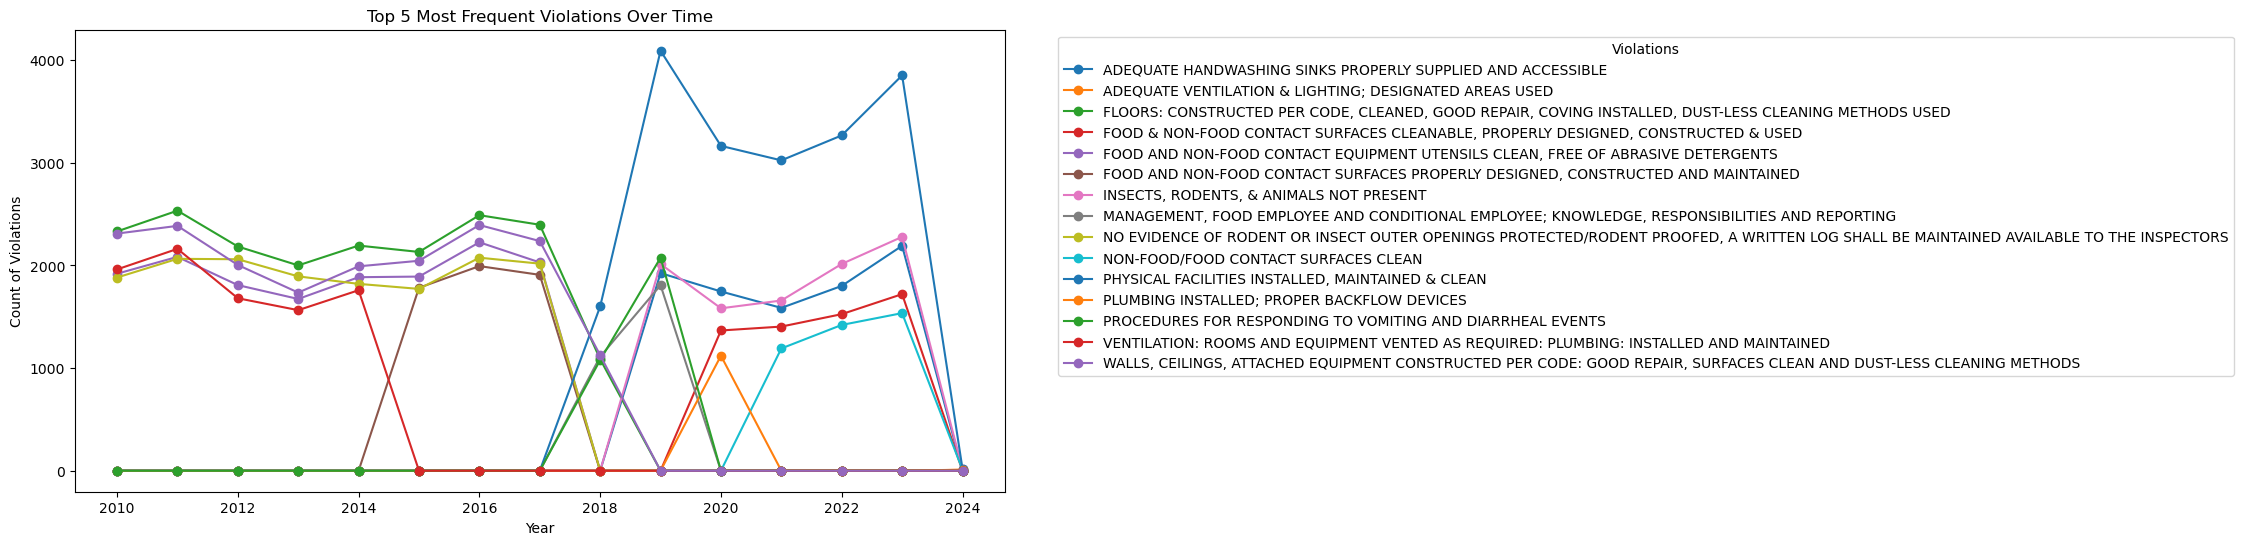

In [17]:
# Plot the line chart
plt.figure(figsize=(12, 6))
for violation in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[violation], label=violation, marker='o')

plt.title('Top 5 Most Frequent Violations Over Time')
plt.xlabel('Year')
plt.ylabel('Count of Violations')
plt.legend(title='Violations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

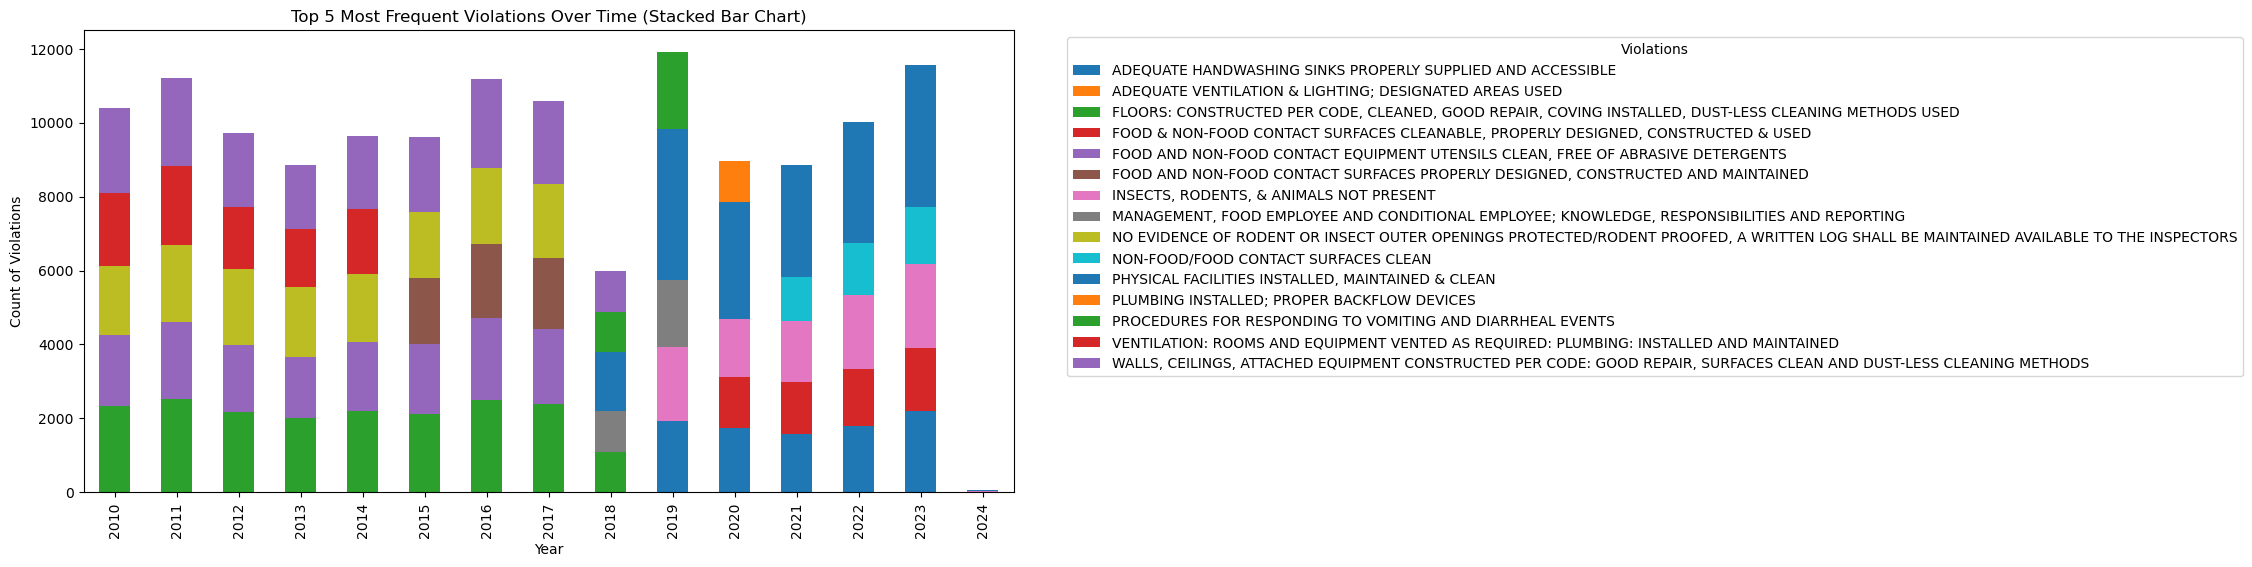

In [18]:
# Plot the stacked bar chart
pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Top 5 Most Frequent Violations Over Time (Stacked Bar Chart)')
plt.xlabel('Year')
plt.ylabel('Count of Violations')
plt.legend(title='Violations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the line and bar chart, it's observed that between 2010 and 2014 of the top 5 most frequent violations are different after the 2015. The change in the top 5 most frequent violations in food inspections after 2015 could be attributed to several factors:

* Changes food industry's practices and standards. Over time, restaurants and food service establishments may have improved their operations in response to previous common violations, leading to a decrease in these violations and an increase in others

* Changes in inspection protocols and regulations could also contribute to the shift in common violations. Regulatory bodies may have updated their guidelines or focused on different areas of inspection based on new research or public health concerns.

* The change could be due to variations in reporting and data collection. Over time, the methods for recording and reporting violations may have changed, leading to differences in the types of violations that are most commonly reported

### Overall top-5 violations over years

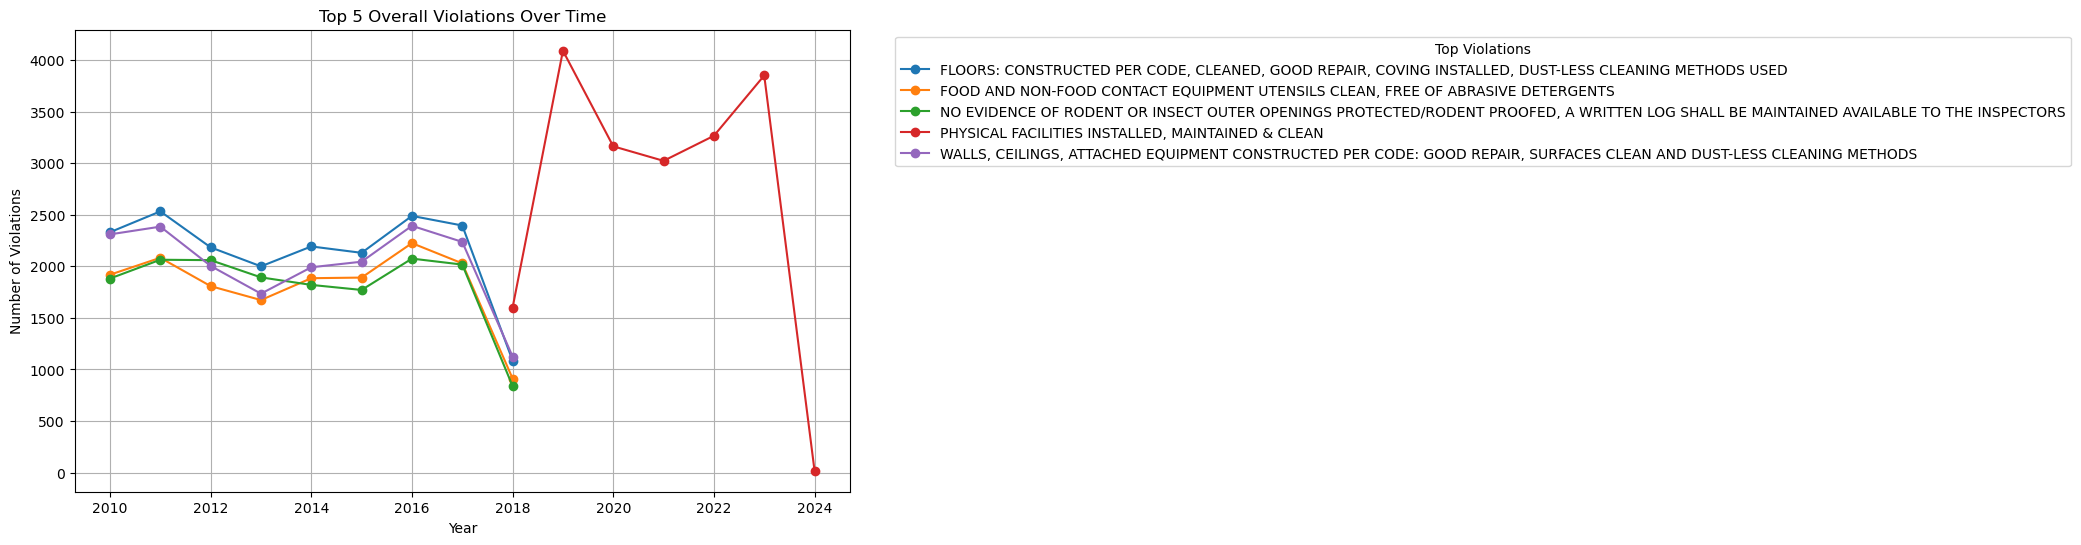

In [20]:
# Explode 'description_only' column
df_exploded = df_cleaned.explode('description_only')

# Group by Year and Violation Description and count the occurrences
violation_counts = df_exploded.groupby(['Year', 'description_only']).size().reset_index(name='count')

# Find the overall top 5 violations across all years
top_violations = violation_counts.groupby('description_only')['count'].sum().nlargest(5).index

# Create a DataFrame that contains only the top 5 violations over time
top_violation_data = violation_counts[violation_counts['description_only'].isin(top_violations)]

# Pivot this DataFrame to get years as index and violations as columns with their counts as values
top_violation_data_pivot = top_violation_data.pivot(index='Year', columns='description_only', values='count')

# Plot the top 5 violations over time
top_violation_data_pivot.plot(kind='line', marker='o', figsize=(10, 6))

# Customize the plot
plt.title('Top 5 Overall Violations Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Violations')
plt.legend(title='Top Violations', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

From the line chart, it's observed that between 2010 and 2018, 4 out of 5 most frequent violations are diminishing, suggesting there were effectively strategies implementing to reduce the violations.